# Dog Breed Classification (CNN)

* **Project:** Dog Vision 🐶👁 - Using computer vision to classify dog photos into different breeds.
* **Goals:** Learn TensorFlow, deep learning and transfer learning, beat the original research paper results (22% accuracy).
* **Domain:** Computer vision.
* **Data:** Images of dogs from [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) (120 dog breeds, 20,000+ images).
* **Problem type:** Multi-class classification (120 different classes).
* **Runtime:** This project is designed to run end-to-end in [Google Colab](https://colab.research.google.com/) (for free GPU access and easy setup). If you'd like to run it locally, it will require environment setup.
* **Demo:** See a [demo of the trained model running on Hugging Face Spaces](https://dhruv-2004-dog-breed-classifier.hf.space/).

In [ ]:
# Quick timestamp
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2025-03-06 05:52:32.978425


In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Do we have access to a GPU?
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be sped up!")
  print(f"[INFO] Accessible devices:\n{device_list}")
else:
  print(f"[INFO] TensorFlow does not have GPU available to use. Models may take a while to train.")
  print(f"[INFO] Accessible devices:\n{device_list}")

[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be sped up!
[INFO] Accessible devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Getting Data

In [ ]:
# Download the dataset into train and test split using TensorFlow Datasets
import tensorflow_datasets as tfds

ds_train, ds_test = tfds.load('stanford_dogs', split=['train', 'test'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

## Exploring the Data

In [ ]:
dataset_info = tfds.builder('stanford_dogs').info

print("Number of classes:", dataset_info.features['label'].num_classes)
print("Class names:", dataset_info.features['label'].names)
print("Training samples:", dataset_info.splits['train'].num_examples)
print("Testing samples:", dataset_info.splits['test'].num_examples)

### View random samples

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [43]:

# Get class names
class_names = dataset_info.features['label'].names

# Function to plot random images
def plot_random_images(dataset, class_names, num_images=10):
    dataset = dataset.shuffle(1000).take(num_images)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for ax, (image, label) in zip(axes.flat, dataset):
        image = tf.cast(image, tf.uint8).numpy()
        label_name = class_names[label.numpy()]

        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis("off")

    plt.show()

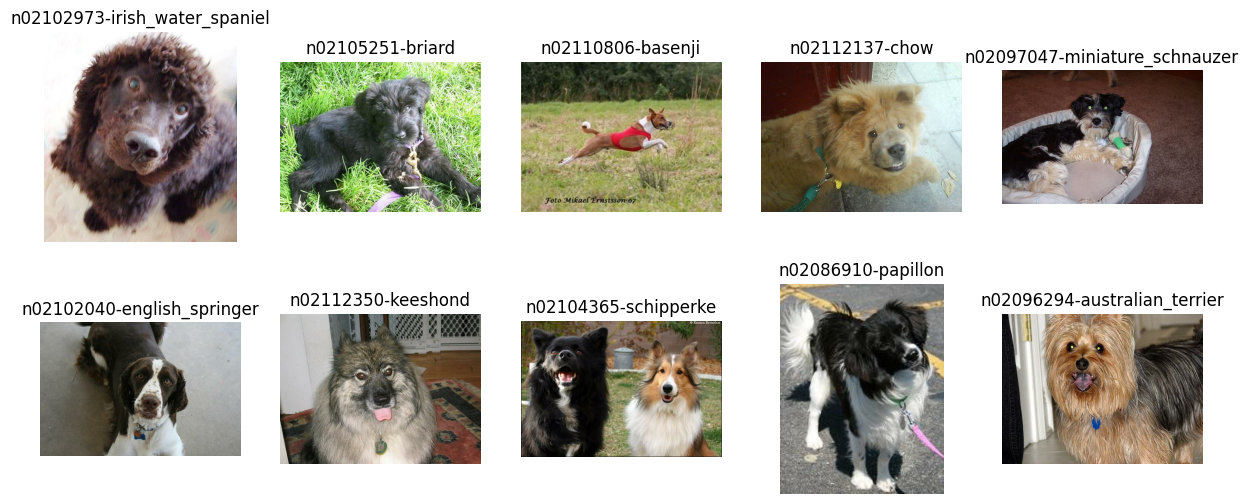

In [44]:
plot_random_images(ds_train, class_names)

### Class Distribution

In [45]:
from collections import Counter

# Count labels in training set
train_labels = [label.numpy() for _, label in ds_train]
train_counts = Counter(train_labels)

In [46]:
# Convert to readable format
train_class_counts = {class_names[k]: v for k, v in train_counts.items()}

In [47]:
# Sort and print class distribution
sorted_counts = dict(sorted(train_class_counts.items(), key=lambda x: x[1], reverse=True))
for breed, count in sorted_counts.items():
    print(f"{breed}: {count} images")

n02094433-yorkshire_terrier: 100 images
n02115913-dhole: 100 images
n02097130-giant_schnauzer: 100 images
n02111129-leonberg: 100 images
n02113624-toy_poodle: 100 images
n02113978-mexican_hairless: 100 images
n02102973-irish_water_spaniel: 100 images
n02088094-afghan_hound: 100 images
n02088632-bluetick: 100 images
n02109047-great_dane: 100 images
n02113799-standard_poodle: 100 images
n02107908-appenzeller: 100 images
n02106382-bouvier_des_flandres: 100 images
n02111889-samoyed: 100 images
n02096585-boston_bull: 100 images
n02110806-basenji: 100 images
n02110185-siberian_husky: 100 images
n02106550-rottweiler: 100 images
n02105855-shetland_sheepdog: 100 images
n02088466-bloodhound: 100 images
n02091134-whippet: 100 images
n02108089-boxer: 100 images
n02093428-american_staffordshire_terrier: 100 images
n02093859-kerry_blue_terrier: 100 images
n02105251-briard: 100 images
n02108551-tibetan_mastiff: 100 images
n02091831-saluki: 100 images
n02101006-gordon_setter: 100 images
n02087394-rhod

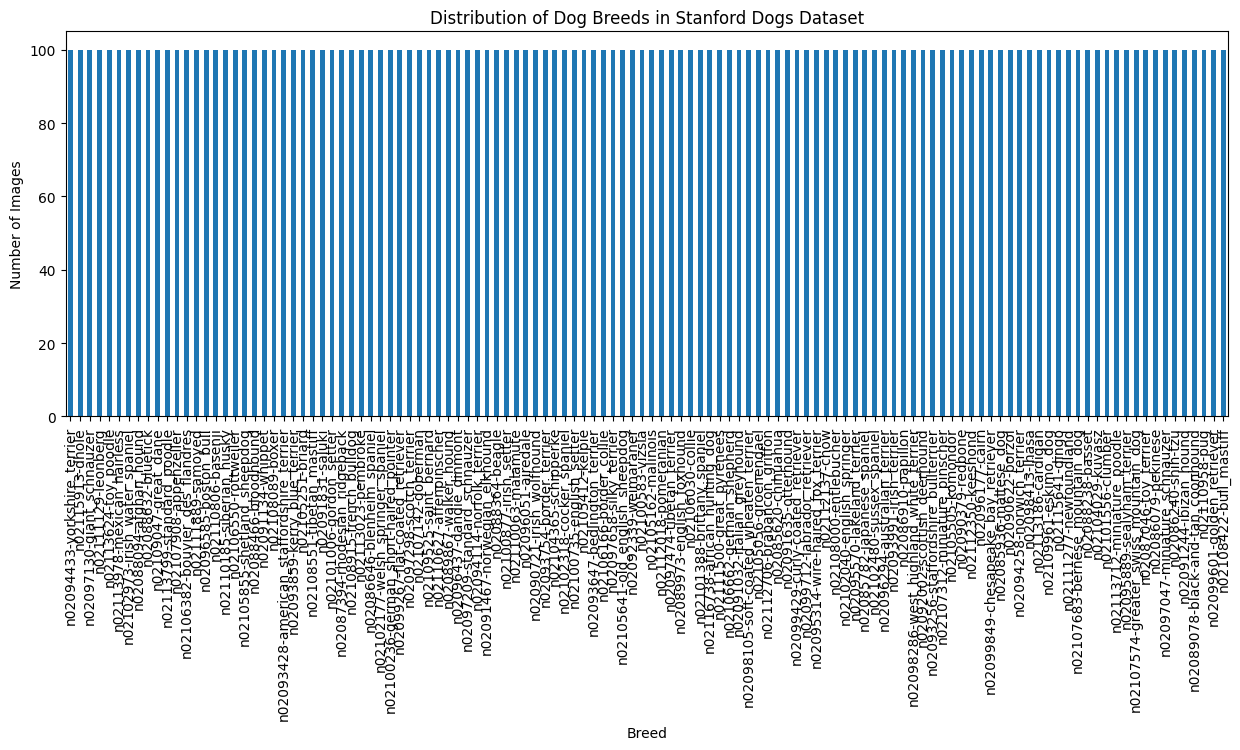

In [48]:
# Visualize as a bar chart
import pandas as pd

df = pd.DataFrame(list(sorted_counts.items()), columns=["Breed", "Count"])
df.plot(kind="bar", x="Breed", figsize=(15, 5), legend=False)
plt.ylabel("Number of Images")
plt.title("Distribution of Dog Breeds in Stanford Dogs Dataset")
plt.xticks(rotation=90)
plt.show()

In [49]:
# Since we are using tensorflow_datasets mapping is already done
# Get Class Names with Their Corresponding Label Numbers
import tensorflow_datasets as tfds

# Get class names and clean them
dog_names = [name.split('-')[1].replace('_', ' ').title() for name in dataset_info.features['label'].names]

# Print class names with their assigned label numbers
for i, class_name in enumerate(class_names):
    print(f"Label {i}: {class_name}")

Label 0: n02085620-chihuahua
Label 1: n02085782-japanese_spaniel
Label 2: n02085936-maltese_dog
Label 3: n02086079-pekinese
Label 4: n02086240-shih-tzu
Label 5: n02086646-blenheim_spaniel
Label 6: n02086910-papillon
Label 7: n02087046-toy_terrier
Label 8: n02087394-rhodesian_ridgeback
Label 9: n02088094-afghan_hound
Label 10: n02088238-basset
Label 11: n02088364-beagle
Label 12: n02088466-bloodhound
Label 13: n02088632-bluetick
Label 14: n02089078-black-and-tan_coonhound
Label 15: n02089867-walker_hound
Label 16: n02089973-english_foxhound
Label 17: n02090379-redbone
Label 18: n02090622-borzoi
Label 19: n02090721-irish_wolfhound
Label 20: n02091032-italian_greyhound
Label 21: n02091134-whippet
Label 22: n02091244-ibizan_hound
Label 23: n02091467-norwegian_elkhound
Label 24: n02091635-otterhound
Label 25: n02091831-saluki
Label 26: n02092002-scottish_deerhound
Label 27: n02092339-weimaraner
Label 28: n02093256-staffordshire_bullterrier
Label 29: n02093428-american_staffordshire_terrier


In [ ]:
class_names = [name.split('-')[1].replace('_', ' ').title() for name in dataset_info.features['label'].names]

In [56]:

with open("stanford_dogs_class_names.txt", "w") as file:
    for name in class_names:
        file.write(name + "\n")

### Making a 10% training dataset split

In [ ]:
# Get the number of training samples
train_size = tf.data.experimental.cardinality(ds_train).numpy()
train_size

12000

In [ ]:
# Take a random 10% sample
train_10_percent = ds_train.shuffle(buffer_size=train_size, seed=42).take(int(0.1 * train_size))

In [ ]:
# Verify the size
train_10_percent_size = sum(1 for _ in train_10_percent)
print(f"Original training set size: {train_size}")
print(f"10% training subset size: {train_10_percent_size}")

Original training set size: 12000
10% training subset size: 1200


In [ ]:
# Checking the Class Distribution
from collections import Counter

# Count labels in the 10% dataset
train_10_labels = [label.numpy() for _, label in train_10_percent]
label_counts = Counter(train_10_labels)

# Get class names
dataset_info = tfds.builder("stanford_dogs").info
class_names = [name.split('-')[1].replace('_', ' ').title() for name in dataset_info.features['label'].names]

# Print class distribution
for label, count in sorted(label_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_names[label]}: {count} images")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert label counts to DataFrame
df_counts = pd.DataFrame({
    "Breed": [class_names[i] for i in label_counts.keys()],
    "Count": list(label_counts.values())
})

# Sort by count
df_counts = df_counts.sort_values(by="Count", ascending=False)

# Plot breed distribution
plt.figure(figsize=(14, 7))
plt.bar(df_counts["Breed"], df_counts["Count"], color="skyblue")

# Customization
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Image Count")
plt.title("Breed Distribution in 10% Training Dataset")
plt.tight_layout()  # Ensures labels are readable

# Show plot
plt.show()

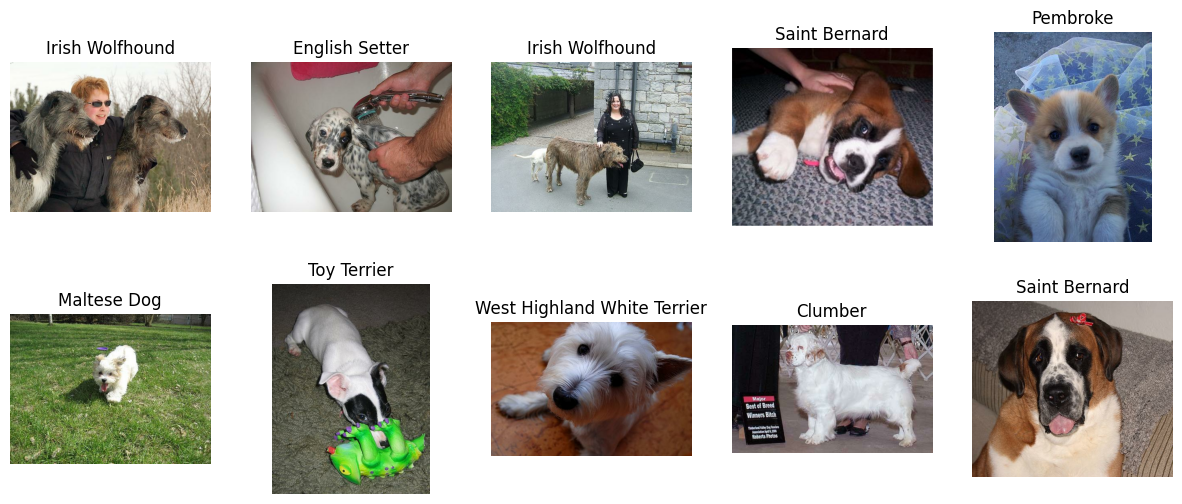

In [ ]:
# Visualizing Images from the 10% Training Subset
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to plot random images
def plot_random_images(dataset, class_names, num_images=10):
    dataset = dataset.shuffle(1000).take(num_images)  # Shuffle and take random samples
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for ax, (image, label) in zip(axes.flat, dataset):
        image = tf.image.convert_image_dtype(image, dtype=tf.uint8).numpy()
        label_name = class_names[label.numpy()]

        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis("off")

    plt.show()

# Plot 10 images from the 10% training set
plot_random_images(train_10_percent, class_names)

### Tensorflow datasets Prepocessing and Autotunning for performance

In [ ]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [51]:
# Constants
IMG_SIZE = (224, 224)  # Resize all images to 224x224
BATCH_SIZE = 32
SEED = 42

In [52]:
# Preprocessing function
def preprocess(image, label):
    # Resize image
    image = tf.image.resize(image, IMG_SIZE)
    # Normalize pixel values between 0 and 1
    # image = image / 255.0
    return image, tf.one_hot(label, depth=120)

In [53]:
# Apply preprocessing, shuffle, and batch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (ds_train
            .map(preprocess, num_parallel_calls=AUTOTUNE)
            .shuffle(buffer_size=100*BATCH_SIZE, seed=SEED)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

test_ds = (ds_test
           .map(preprocess, num_parallel_calls=AUTOTUNE)
           .batch(BATCH_SIZE)
           .prefetch(AUTOTUNE))  # No need to shuffle test set

In [ ]:
# Create 10% training subset
train_10_percent_ds = (ds_train
                        .map(preprocess, num_parallel_calls=AUTOTUNE)
                        .shuffle(buffer_size=100*BATCH_ISZE, seed=SEED)
                        .take(int(0.1 * tf.data.experimental.cardinality(ds_train).numpy()))
                        .batch(BATCH_SIZE)
                        .prefetch(AUTOTUNE))

In [ ]:
train_10_percent_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))>

In [ ]:
# Verify dataset shapes
image_batch, label_batch = next(iter(train_ds))
print(f"Image batch shape: {image_batch.shape}")
print(f"Label batch shape: {label_batch.shape}")

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 120)


In [ ]:
# Verify 10% dataset shapes
image_10_batch, label_10_batch = next(iter(train_10_percent_ds))
print(f"10% Image batch shape: {image_10_batch.shape}")
print(f"10% Label batch shape: {label_10_batch.shape}")

10% Image batch shape: (32, 224, 224, 3)
10% Label batch shape: (32, 120)


In [ ]:
# Verify test dataset shapes
image_test_batch, label_test_batch = next(iter(test_ds))
print(f"test Image batch shape: {image_test_batch.shape}")
print(f"test Label batch shape: {label_test_batch.shape}")

test Image batch shape: (32, 224, 224, 3)
test Label batch shape: (32, 120)


In [ ]:
# Checking single sample

# Get a single sample
image_sample, label_sample = image_batch[0], label_batch[0]

# Convert one-hot label to class name
label_index = np.argmax(label_sample.numpy())  # Get class index
dataset_info = tfds.builder("stanford_dogs").info
class_names = [name.split('-')[1].replace('_', ' ').title() for name in dataset_info.features['label'].names]

print(f"Class Index: {label_index}")
print(f"Class Name: {class_names[label_index]}")

Class Index: 93
Class Name: Tibetan Mastiff


In [ ]:
# Get a single sample from a single batch
print(f"Single image tensor:\n{image_batch[0]}\n")
print(f"Single label tensor: {label_batch[0]}") # notice the 1 is the index of the target label (our labels are one-hot encoded)
print(f"Single sample class name: {dog_names[tf.argmax(label_batch[0])]}")

Single image tensor:
[[[122.24282  128.24283  128.24283 ]
  [ 60.572548  66.57255   66.57255 ]
  [ 36.32469   42.32469   42.32469 ]
  ...
  [ 52.33368   64.33368   54.33368 ]
  [ 50.216076  62.36787   47.912487]
  [ 34.014297  47.014297  30.014297]]

 [[ 13.551479  18.41255   18.41255 ]
  [ 41.51015   47.51015   47.51015 ]
  [ 48.4992    54.4992    54.4992  ]
  ...
  [ 51.778122  63.778122  51.778122]
  [ 49.66394   61.825203  47.34142 ]
  [ 33.645687  46.645687  29.645687]]

 [[ 33.25108   39.25108   37.880543]
  [ 57.678726  63.262672  61.892136]
  [ 32.88396   38.88396   37.513428]
  ...
  [ 69.90372   81.90372   68.53318 ]
  [ 43.474644  56.474644  39.474644]
  [ 49.538685  62.538685  45.538685]]

 ...

 [[ 21.754412  26.754412  32.754414]
  [ 19.837027  24.837027  30.837027]
  [ 17.630178  22.630178  28.630178]
  ...
  [ 23.44352   23.523872  13.684578]
  [ 25.685242  25.685242  17.685242]
  [ 25.685242  25.685242  17.685242]]

 [[ 20.004276  25.004276  31.004276]
  [ 19.00169   2

### Visualizing images from our TensorFlow Dataset

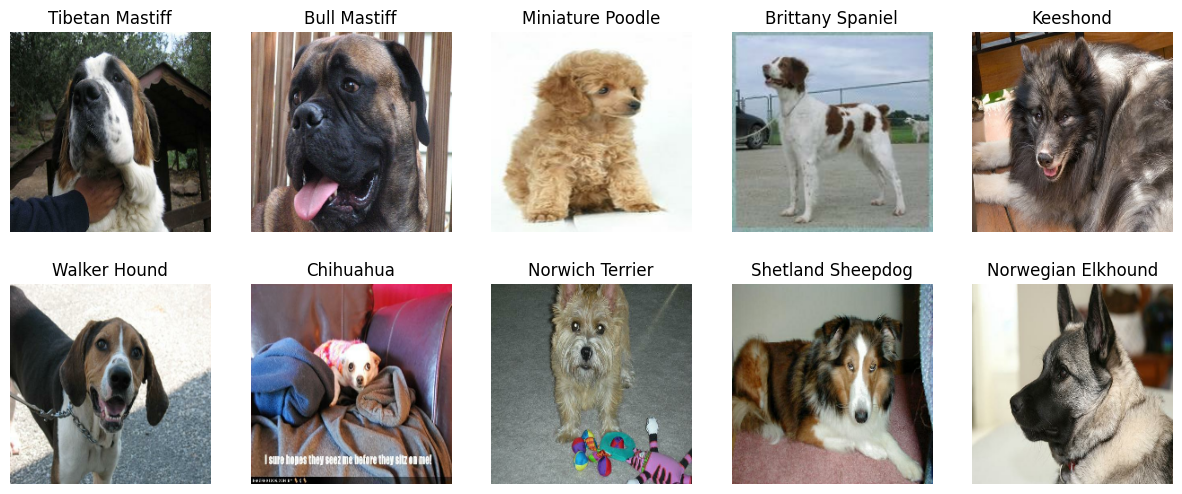

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a batch of images
def plot_batch(images, labels, class_names):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for ax, img, lbl in zip(axes.flat, images, labels):
        ax.imshow(img.numpy().astype("uint8"))
        ax.set_title(class_names[np.argmax(lbl.numpy())])
        ax.axis("off")
    plt.show()

# Display images from training batch
plot_batch(image_batch[:10], label_batch[:10], class_names)

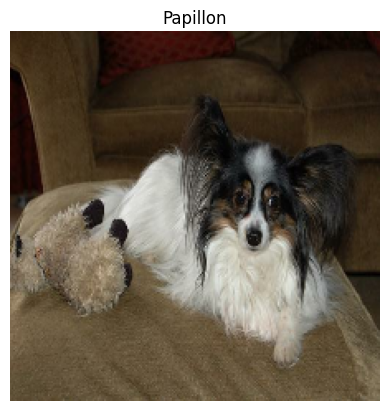

In [ ]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.title(dog_names[tf.argmax(label_batch[0])])
plt.axis("off");

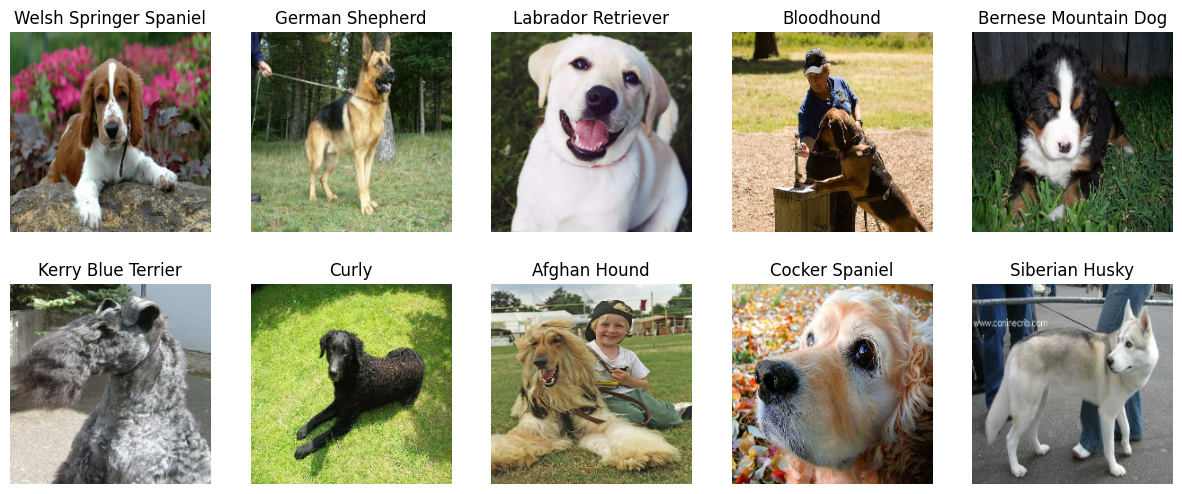

In [ ]:
# Display images from test batch
plot_batch(image_test_batch[:10], label_test_batch[:10], class_names)

## Creating a neural network with TensorFlow

In [ ]:
# Create the input shape to our model
INPUT_SHAPE = (*IMG_SIZE, 3) # * -> Unpacking for (224,224,3) not ((224,224),3)

# Create a base model with no top and a pooling layer built-in
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling="avg",
    include_preprocessing=True,
)

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 56, 56, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 56, 56, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 56, 56, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 56, 56, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 56, 56, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [ ]:
# Count the number of layers
print(f"Number of layers in base_model: {len(base_model.layers)}")

Number of layers in base_model: 271


### Model input and output shapes

In [ ]:
# Check the input shape of our model
base_model.input_shape

(None, 224, 224, 3)

In [ ]:
# Check the model's output shape
base_model.output_shape

(None, 1280)

### Model Parameters

In [ ]:
import numpy as np

def count_parameters(model, print_output=True):
  trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.trainable_weights])
  non_trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.non_trainable_weights])
  total_parameters = trainable_parameters + non_trainable_parameters
  if print_output:
    print(f"Model {model.name} parameter counts:")
    print(f"Total parameters: {total_parameters}")
    print(f"Trainable parameters: {trainable_parameters}")
    print(f"Non-trainable parameters: {non_trainable_parameters}")
  else:
    return total_parameters, trainable_parameters, non_trainable_parameters

count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312
Trainable parameters: 5858704
Non-trainable parameters: 60608


In [ ]:
# Freeze the base model
base_model.trainable = False
base_model.trainable

False

In [ ]:
count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312.0
Trainable parameters: 0.0
Non-trainable parameters: 5919312


### Passing data through our model

In [ ]:
# Current image shape
shape_of_image_without_batch = image_batch[0].shape

# Add a batch dimension to our single image
shape_of_image_with_batch = tf.expand_dims(input=image_batch[0], axis=0).shape

print(f"Shape of image without batch: {shape_of_image_without_batch}")
print(f"Shape of image with batch: {shape_of_image_with_batch}")

Shape of image without batch: (224, 224, 3)
Shape of image with batch: (1, 224, 224, 3)


In [ ]:
# Extract features from a single image using our base model
feature_extraction = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_extraction

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.09189111, -0.01189328,  0.00537432, ..., -0.08961146,
        -0.0660355 ,  0.6638845 ]], dtype=float32)>

In [ ]:
# Check shape of feature extraction
feature_extraction.shape

TensorShape([1, 1280])

### Creating a custom model for our dog vision problem

### Creating a model with the Sequential API

In [ ]:
# Create a sequential model
tf.random.set_seed(42)
sequential_model = tf.keras.Sequential([base_model, # input and middle layers
                                        tf.keras.layers.Dense(units=len(dog_names), # output layer
                                                              activation="softmax")])
sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
# Check the input shape
sequential_model.input_shape

(None, 224, 224, 3)

In [ ]:
# Check the output shape
sequential_model.output_shape

(None, 120)

In [ ]:
# Get a single image with a batch size of 1
single_image_input = tf.expand_dims(image_batch[0], axis=0)

# Pass the image through our model
single_image_output_sequential = sequential_model(single_image_input)

# Check the output
single_image_output_sequential

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[0.00645626, 0.00412295, 0.00913102, 0.00890656, 0.00801164,
        0.01065792, 0.00357966, 0.02064963, 0.00502078, 0.0045368 ,
        0.00822409, 0.00689403, 0.00686905, 0.00759084, 0.01340883,
        0.00440856, 0.01035691, 0.00725644, 0.0065057 , 0.01394338,
        0.01061229, 0.01152813, 0.0157184 , 0.00734262, 0.00608641,
        0.00552014, 0.01219284, 0.00604294, 0.00950466, 0.00770055,
        0.01217885, 0.00980888, 0.00625881, 0.00856049, 0.00773496,
        0.00802392, 0.01475408, 0.00457115, 0.00482472, 0.00606044,
        0.00497211, 0.00838208, 0.01144268, 0.01452915, 0.00772678,
        0.00552607, 0.00796537, 0.00712658, 0.00913011, 0.0114064 ,
        0.00910426, 0.00570173, 0.00791042, 0.00358095, 0.01334429,
        0.00780985, 0.01174207, 0.00860788, 0.00752351, 0.0051492 ,
        0.00696854, 0.00750464, 0.0083057 , 0.00884263, 0.00695272,
        0.00770641, 0.00601868, 0.00782243, 0.02626702, 0.00389597

In [ ]:
# Find the index with the highest value
highest_value_index_sequential_model_output = np.argmax(single_image_output_sequential)
highest_value_sequential_model_output = np.max(single_image_output_sequential)

print(f"Highest value index: {highest_value_index_sequential_model_output} ({dog_names[highest_value_index_sequential_model_output]})")
print(f"Prediction probability: {highest_value_sequential_model_output}")

Highest value index: 68 (Cocker Spaniel)
Prediction probability: 0.02626701630651951


In [ ]:
# Check the original label value
print(f"Predicted value: {highest_value_index_sequential_model_output}")
print(f"Actual value: {tf.argmax(label_batch[0]).numpy()}")

Predicted value: 68
Actual value: 83


In [ ]:
# Index on class_names with our model's highest prediction probability
sequential_model_predicted_label = class_names[tf.argmax(sequential_model(tf.expand_dims(image_batch[0], axis=0)), axis=1).numpy()[0]]

# Get the truth label
single_image_ground_truth_label = class_names[tf.argmax(label_batch[0])]

# Print predicted and ground truth labels
print(f"Sequential model predicted label: {sequential_model_predicted_label}")
print(f"Ground truth label: {single_image_ground_truth_label}")

Sequential model predicted label: Cocker Spaniel
Ground truth label: Rottweiler


### Creating a model with the Functional API

In [ ]:
inputs = tf.keras.Input(shape=INPUT_SHAPE)

x = base_model(inputs, training=False)

outputs = tf.keras.layers.Dense(units=len(class_names), # one output per class
                                activation="softmax",
                                name="output_layer")(x)

functional_model = tf.keras.Model(inputs=inputs,
                                  outputs=outputs,
                                  name="functional_model")

functional_model.summary()

Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
# Pass a single image through our functional_model
single_image_output_functional = functional_model(single_image_input)

# Find the index with the highest value
highest_value_index_functional_model_output = np.argmax(single_image_output_functional)
highest_value_functional_model_output = np.max(single_image_output_functional)

highest_value_index_functional_model_output, highest_value_functional_model_output

(66, 0.017661894)

### Functionizing Model creation

In [ ]:
def create_model(include_top: bool = False,
                 num_classes: int = 1000,
                 input_shape: tuple[int, int, int] = (224, 224, 3),
                 include_preprocessing: bool = True,
                 trainable: bool = False,
                 dropout: float = 0.2,
                 model_name: str = "model") -> tf.keras.Model:
  """
  Create an EfficientNetV2 B0 feature extractor model with a custom classifier layer.

  Args:
      include_top (bool, optional): Whether to include the top (classifier) layers of the model.
      num_classes (int, optional): Number of output classes for the classifier layer.
      input_shape (tuple[int, int, int], optional): Input shape for the model's images (height, width, channels).
      include_preprocessing (bool, optional): Whether to include preprocessing layers for image normalization.
      trainable (bool, optional): Whether to make the base model trainable.
      dropout (float, optional): Dropout rate for the global average pooling layer.
      model_name (str, optional): Name for the created model.

  Returns:
      tf.keras.Model: A TensorFlow Keras model with the specified configuration.
  """
  # Create base model
  base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=include_top,
    weights="imagenet",
    input_shape=input_shape,
    include_preprocessing=include_preprocessing,
    pooling="avg"
  )

  # Freeze the base model
  base_model.trainable = trainable

  # Create input layer
  inputs = tf.keras.Input(shape=input_shape, name="input_layer")

  # Create model backbone (middle/hidden layers)
  x = base_model(inputs, training=trainable)

  # x = tf.keras.layers.Dropout(0.2)(x) # optional regularization layer

  # output layer
  outputs = tf.keras.layers.Dense(units=num_classes,
                                  activation="softmax",
                                  name="output_layer")(x)

  # Connect input and output layer
  model = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name=model_name)

  return model

In [ ]:
# Define Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,  # Stop after 5 epochs without improvement
                                                  restore_best_weights=True)

In [ ]:
# Create a model
model_0 = create_model(num_classes=len(class_names))
model_0.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

## Model 0 - Train a model on 10% of the training data

In [ ]:
# Define Model Using TPU Strategy
with strategy.scope(): # for TPU
    model_0 = create_model(num_classes=120, model_name="model_0")

    model_0.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # TPU Optimized Adam
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

model_0.summary()

Model: "model_0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
tf.data.experimental.cardinality(test_ds).numpy(),tf.data.experimental.cardinality(train_10_percent_ds).numpy(),tf.data.experimental.cardinality(train_ds).numpy()

(269, 38, 375)

In [ ]:
EPOCHS = 10
# Set validation steps dynamically
validation_steps = min(38, tf.data.experimental.cardinality(test_ds).numpy())

history_0 = model_0.fit(
    train_10_percent_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    steps_per_epoch=38,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 54s 526ms/step - accuracy: 5.1706e-04 - loss: 4.8551 - val_accuracy: 0.5052 - val_loss: 3.0584
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8973 - loss: 2.4042 - val_accuracy: 0.6864 - val_loss: 1.8954
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9852 - loss: 1.1771 - val_accuracy: 0.8283 - val_loss: 1.2937
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9925 - loss: 0.6882 - val_accuracy: 0.8626 - val_loss: 0.9757
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9958 - loss: 0.4747 - val_accuracy: 0.8690 - val_loss: 0.7943
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9958 - loss: 0.3584 - val_accuracy: 0.8724 - val_loss: 0.6866
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 1.0000 - loss: 0.3329 - val_accuracy: 0.8729 - val_loss: 0.6133
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9999 - loss: 0.2134 - val_accurac

### Evaluate Model 0 on the test data

In [ ]:
# Inspect History.history attribute for model_0
history_0.history

{'accuracy': [0.0005487077287398279,
  0.8970021605491638,
  0.984743058681488,
  0.9922475814819336,
  0.9956666231155396,
  0.9956599473953247,
  0.9999457597732544,
  0.9999390840530396,
  0.9999991655349731,
  0.9999991655349731],
 'loss': [4.854789733886719,
  2.4043071269989014,
  1.177141785621643,
  0.6883379220962524,
  0.4747893512248993,
  0.35840433835983276,
  0.33266663551330566,
  0.2133830338716507,
  0.16479915380477905,
  0.16915136575698853],
 'val_accuracy': [0.5052167773246765,
  0.6863560676574707,
  0.8282997608184814,
  0.8626006245613098,
  0.8690102696418762,
  0.8724282383918762,
  0.8728546500205994,
  0.8728545308113098,
  0.8728546500205994,
  0.9001984000205994],
 'val_loss': [3.058379888534546,
  1.8954498767852783,
  1.293688178062439,
  0.9757460355758667,
  0.7943241596221924,
  0.6865624785423279,
  0.6132730841636658,
  0.5643912553787231,
  0.5365649461746216,
  0.503932774066925]}

In [ ]:
def plot_model_loss_curves(history: tf.keras.callbacks.History) -> None:
  """Takes a History object and plots loss and accuracy curves."""

  # Get the accuracy values
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  # Get the loss values
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # Get the number of epochs
  epochs_range = range(len(acc))

  # Create accuracy curves plot
  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label="Training Accuracy")
  plt.plot(epochs_range, val_acc, label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  # Create loss curves plot
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label="Training Loss")
  plt.plot(epochs_range, val_loss, label="Validation Loss")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.show()

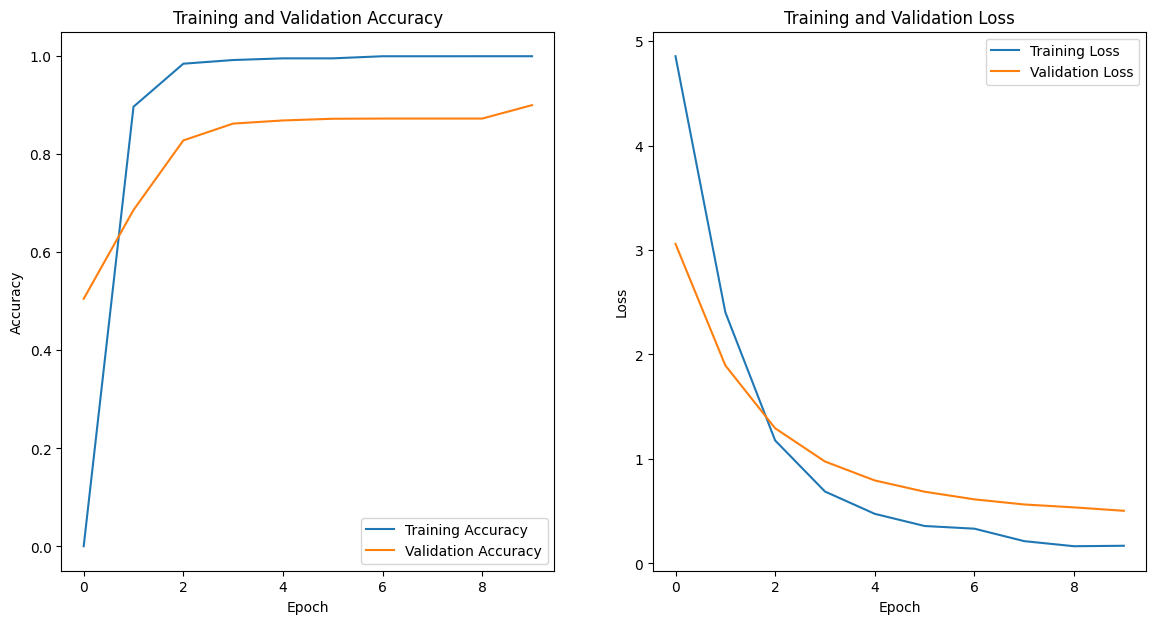

In [ ]:
plot_model_loss_curves(history=history_0)

## Model 1 - Train a model on 100% of the training data

In [ ]:
# Define Model
model_1 = create_model(num_classes=120, model_name="model_1")

# Compile model
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Fit model
EPOCHS = 15
history_1 = model_1.fit(train_ds,
                        validation_data=test_ds,
                        epochs=EPOCHS,
                        callbacks=[early_stopping])

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 116ms/step - accuracy: 0.5609 - loss: 2.4014 - val_accuracy: 0.8744 - val_loss: 0.5000
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.8741 - loss: 0.4678 - val_accuracy: 0.8759 - val_loss: 0.4115
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9017 - loss: 0.3443 - val_accuracy: 0.8772 - val_loss: 0.3851
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9199 - loss: 0.2771 - val_accuracy: 0.8841 - val_loss: 0.3682
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9318 - loss: 0.2421 - val_accuracy: 0.8839 - val_loss: 0.3652
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.9462 - loss: 0.1987 - val_accuracy: 0.8805 - val_loss: 0.3687
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9565 - loss: 0.1759 - val_accuracy: 0.8830 - val_loss: 0.3642
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 106ms/step - accuracy: 0.9630 - loss: 0.1465

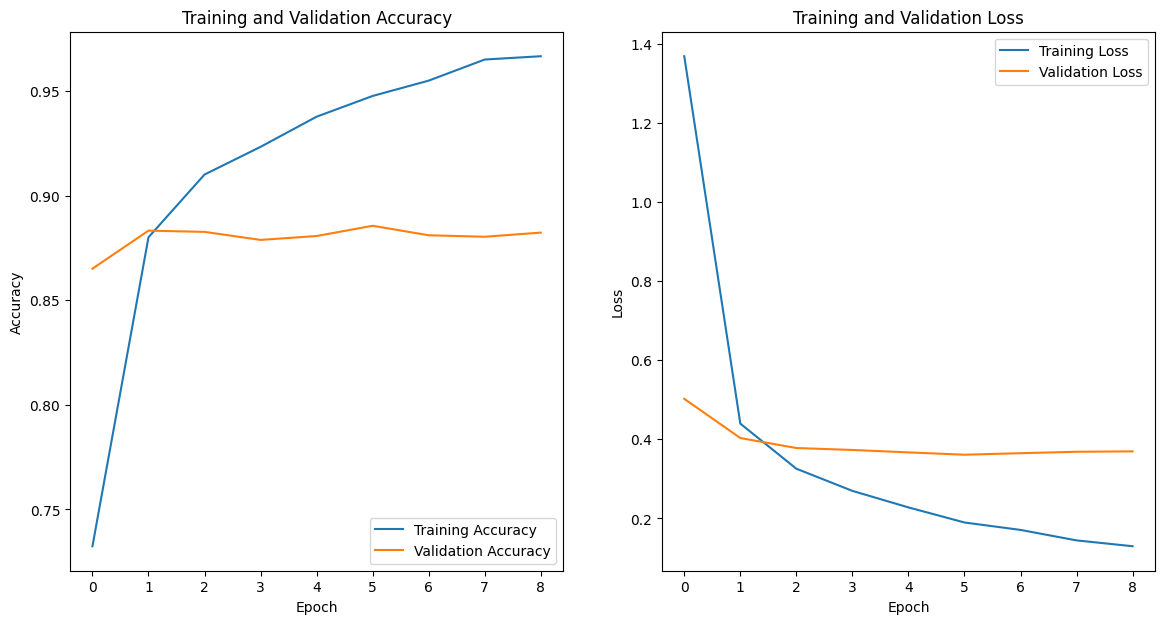

In [ ]:
# Plot model_1 loss curves
plot_model_loss_curves(history=history_1)

In [ ]:
# predictions
test_preds = model_1.predict(test_ds)

269/269 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step


In [ ]:
test_preds.shape

(8580, 120)

In [ ]:
import numpy as np

# Initialize empty lists
test_images_list = []
test_labels_list = []

# Extract only the first 10 images & labels
for images, labels in test_ds:
    for img, lbl in zip(images, labels):
        test_images_list.append(img.numpy())  # Convert single image to NumPy
        test_labels_list.append(lbl.numpy())  # Convert single label to NumPy
        if len(test_images_list) == 10:  # Stop when we have 10 images
            break
    if len(test_images_list) == 10:
        break

# Convert lists to NumPy arrays
test_ds_images = np.array(test_images_list)
test_ds_labels = np.array(test_labels_list)

# Check shape
print(f"Test images shape: {test_ds_images.shape}")
print(f"Test labels shape: {test_ds_labels.shape}")

Test images shape: (10, 224, 224, 3)
Test labels shape: (10, 120)


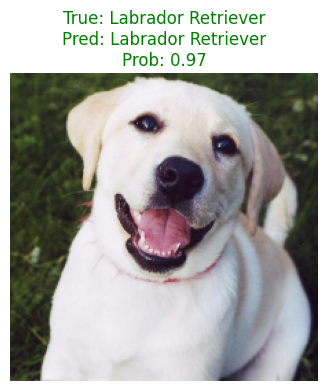

In [ ]:
# Set target index
target_index =2

# Get test image
test_image = test_ds_images[target_index]

# Get truth label (index of max in test label)
test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]

# Get prediction probabilities
test_image_pred_probs = test_preds[target_index]

# Get index of class with highest prediction probability
test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

# Plot the image
plt.figure(figsize=(5, 4))
plt.imshow(test_image.astype("uint8"))

# Create sample title with prediction probability value
title = f"""True: {test_image_truth_label}
Pred: {test_image_pred_class}
Prob: {np.max(test_image_pred_probs):.2f}"""

# Colour the title based on correctness of pred
plt.title(title,
          color="green" if test_image_truth_label == test_image_pred_class else "red")
plt.axis("off");

### Create a confusion matrix

In [ ]:
# For all the labels
test_ds_labels = np.concatenate([labels for images, labels in test_ds], axis=0)
len(test_ds_labels)

8580

In [ ]:
# Get argmax labels of test predictions and test ground truth
test_preds_labels = test_preds.argmax(axis=-1)
test_ds_labels_argmax = test_ds_labels.argmax(axis=-1)

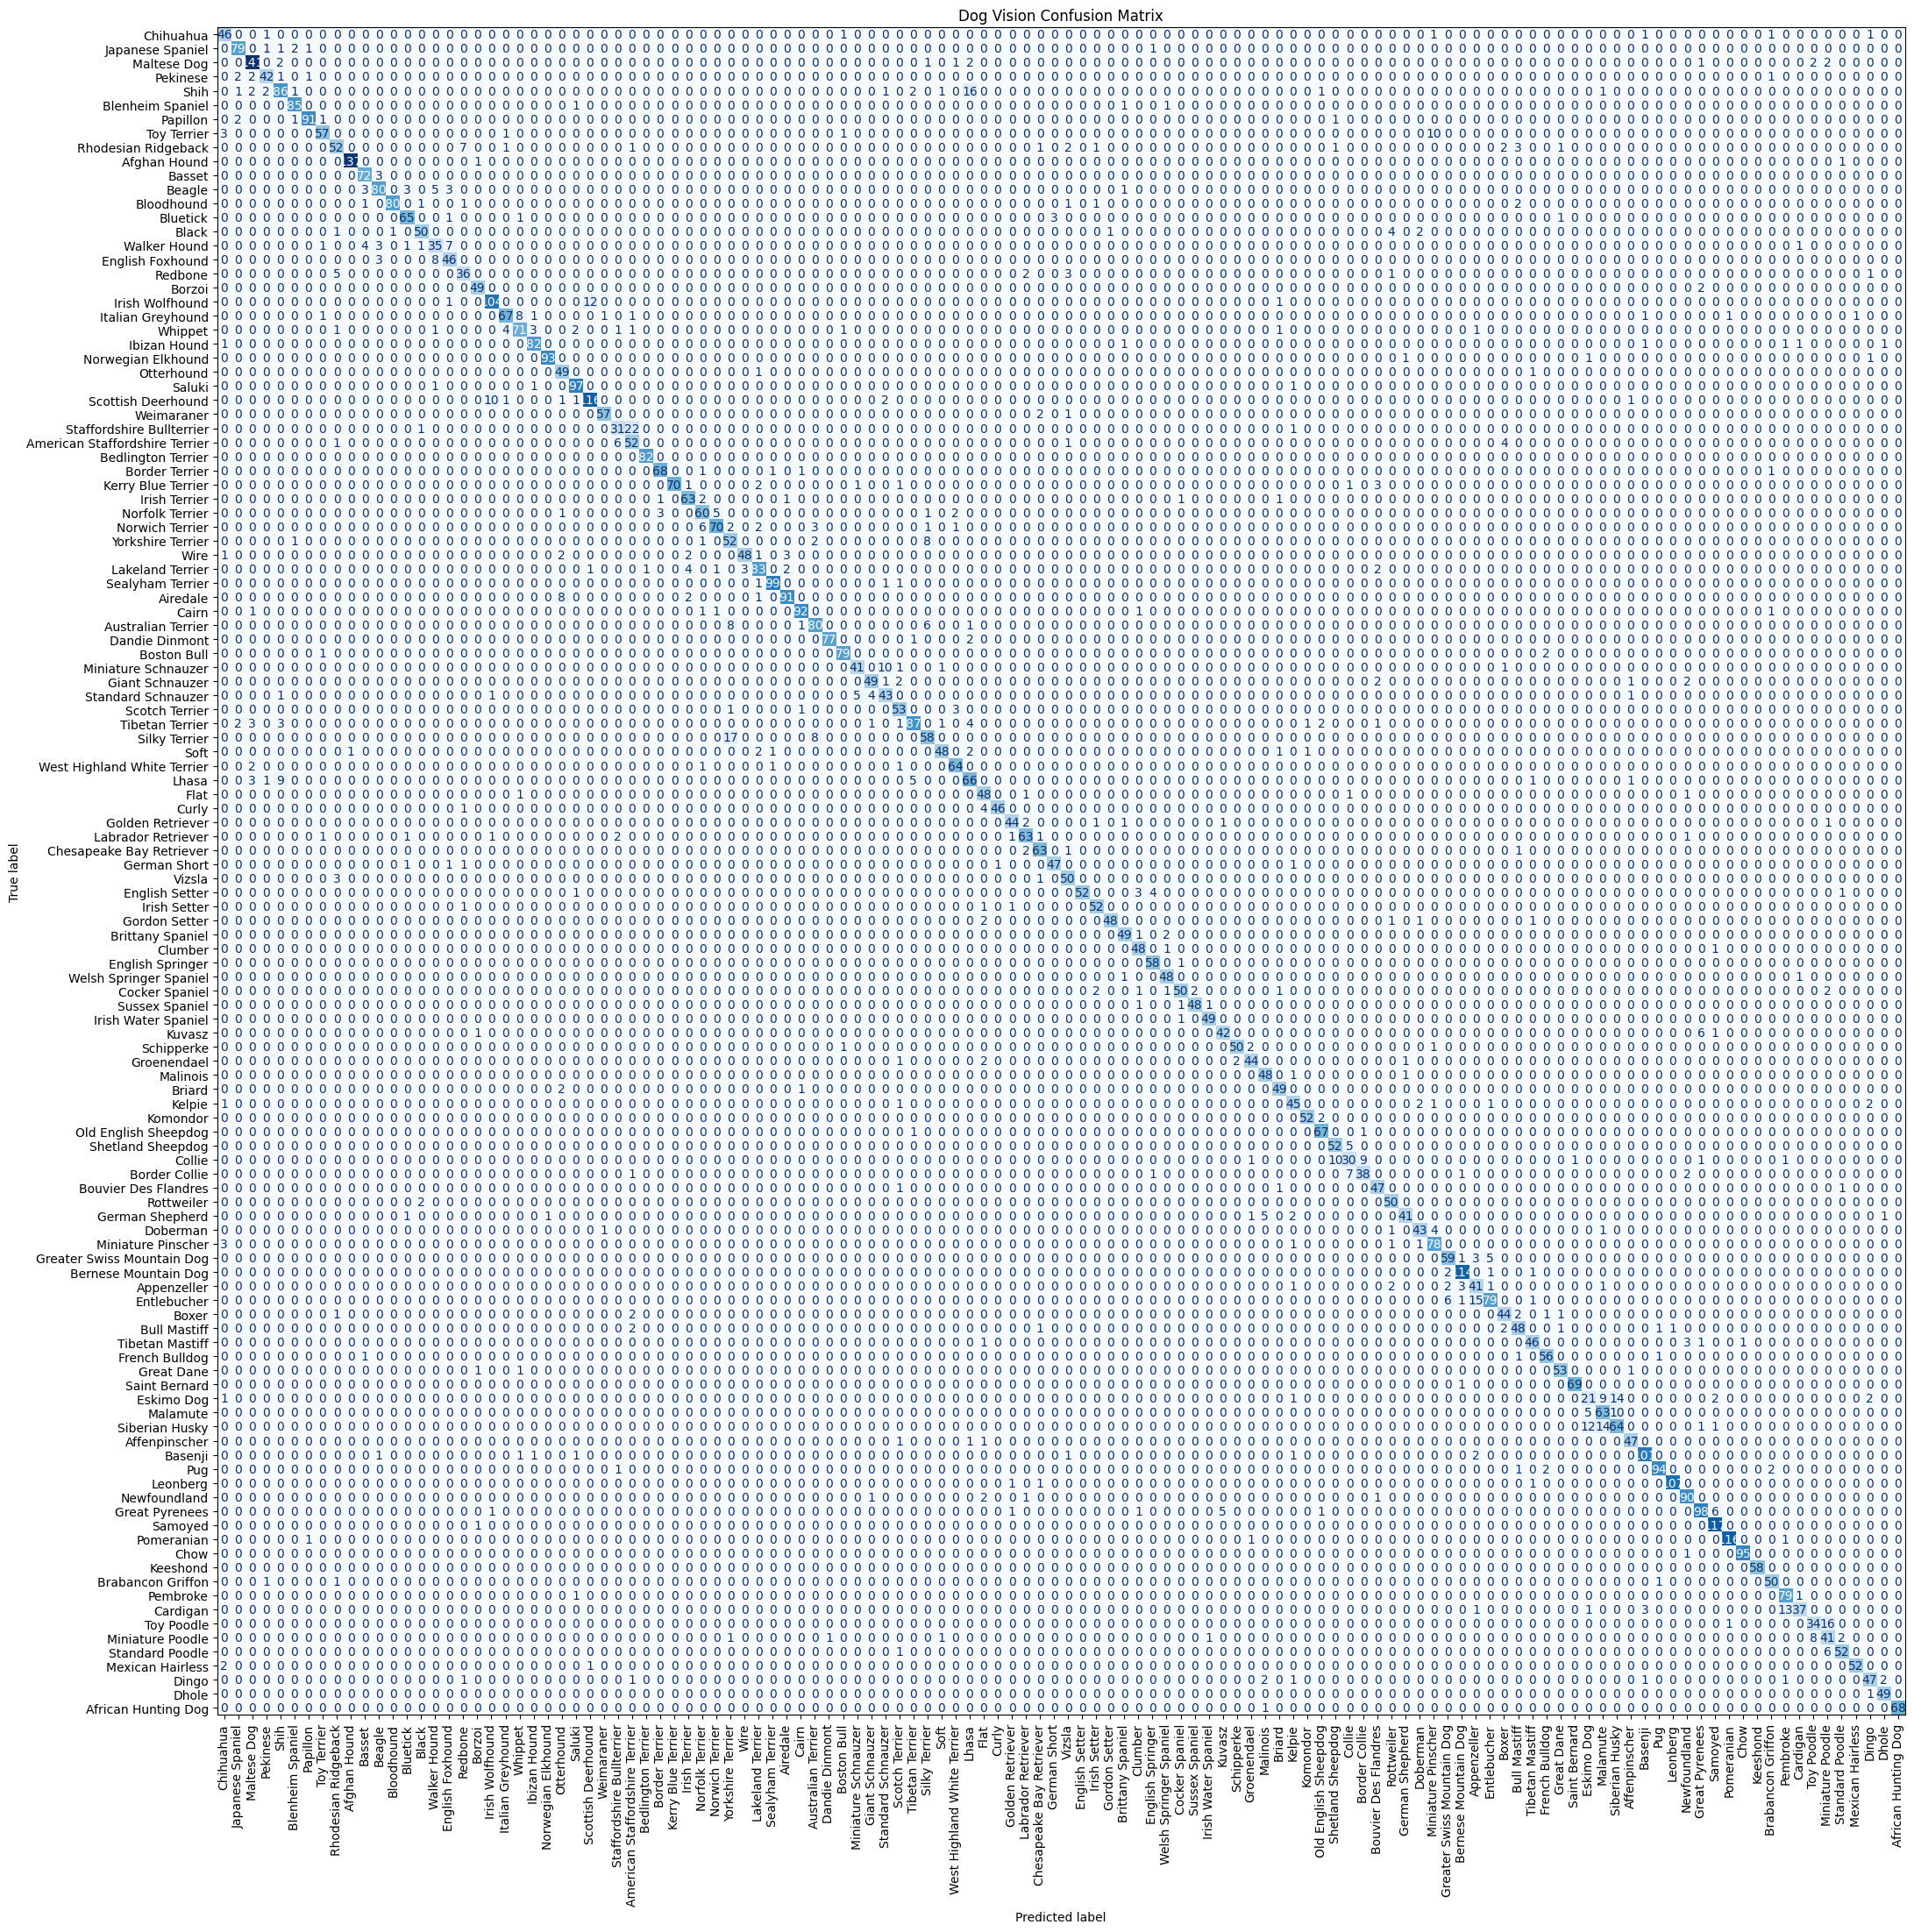

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
confusion_matrix_dog_preds = confusion_matrix(y_true=test_ds_labels_argmax, # requires all labels to be in same format (e.g. not one-hot)
                                              y_pred=test_preds_labels)
# Create a confusion matrix plot
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dog_preds,
                                                  display_labels=class_names)
fig, ax = plt.subplots(figsize=(25, 25))
ax.set_title("Dog Vision Confusion Matrix")
confusion_matrix_display.plot(xticks_rotation="vertical",
                              cmap="Blues",
                              colorbar=False,
                              ax=ax);

## Save and load the best model


In [7]:
model_save_path = "/content/drive/MyDrive/Dog_vision_model/dog_vision_model.keras"

In [ ]:
# Save the model to .keras
model_1.save(filepath=model_save_path)

In [8]:
# Load the model
loaded_model = tf.keras.models.load_model(filepath=model_save_path)

In [31]:
# Save the model to .keras
model_save_path = "dog_vision_model_demo.keras"
loaded_model.save(filepath=model_save_path)

In [ ]:
# Evaluate the loaded model
loaded_model_results = loaded_model.evaluate(test_ds)

## Make predictions on custom images with the best model

In [9]:
# Download a set of custom images from GitHub and unzip them
!wget -nc https://github.com/Dhruv-2004/Dog-breed-prediction/raw/main/dog-photos.zip
!unzip dog-photos.zip

--2025-03-07 12:55:18--  https://github.com/Dhruv-2004/Dog-breed-prediction/raw/main/dog-photos.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Dhruv-2004/Dog-breed-prediction/main/dog-photos.zip [following]
--2025-03-07 12:55:19--  https://media.githubusercontent.com/media/Dhruv-2004/Dog-breed-prediction/main/dog-photos.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6865509 (6.5M) [application/zip]
Saving to: ‘dog-photos.zip’

dog-photos.zip      100%[===================>]   6.55M  --.-KB/s    in 0.07s   

2025-03-07 12:55:20 (96.3 MB/s) - ‘dog-photos.zip’ saved [686550

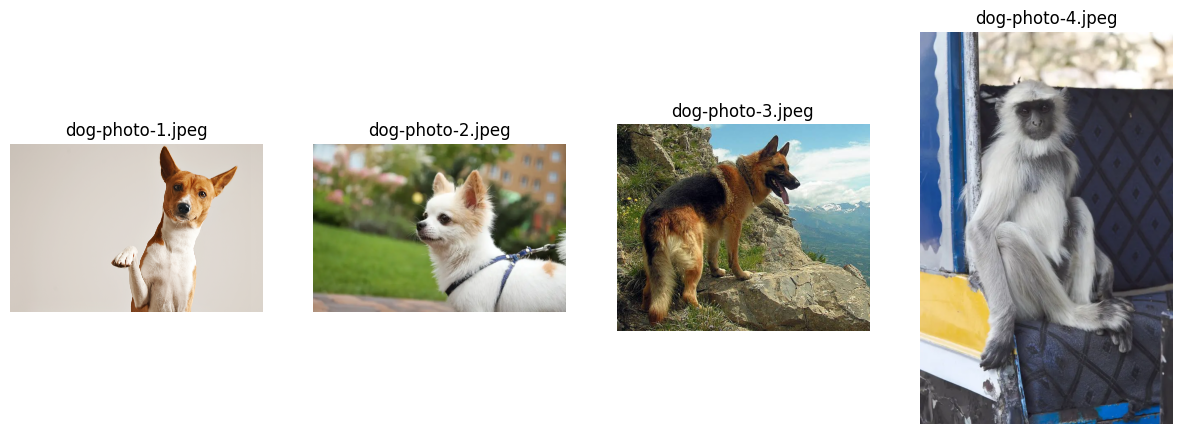

In [10]:
import matplotlib.pyplot as plt
# Create list of paths for custom dog images
custom_image_paths = ["dog-photo-1.jpeg",
                      "dog-photo-2.jpeg",
                      "dog-photo-3.jpeg",
                      "dog-photo-4.jpeg"]

# Iterate through list of dog images and plot each one
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(plt.imread(custom_image_paths[i]))
  ax.axis("off")
  ax.set_title(custom_image_paths[i])

In [11]:
IMG_SIZE = (224,224)
# Load the image (into PIL format)
custom_image = tf.keras.utils.load_img(
  path="dog-photo-1.jpeg",
  color_mode="rgb",
  target_size=IMG_SIZE, # (224, 224) or (img_height, img_width)
)

type(custom_image), custom_image

(PIL.Image.Image, <PIL.Image.Image image mode=RGB size=224x224>)

In [12]:
# Turn the image into a tensor
custom_image_tensor = tf.keras.utils.img_to_array(custom_image)
custom_image_tensor.shape

(224, 224, 3)

In [13]:
# Option 1: Add batch dimension to custom_image_tensor
print(f"Shape of custom image tensor: {np.array([custom_image_tensor]).shape}")
print(f"Shape of custom image tensor: {tf.expand_dims(custom_image_tensor, axis=0).shape}")

Shape of custom image tensor: (1, 224, 224, 3)
Shape of custom image tensor: (1, 224, 224, 3)


In [14]:
# Get prediction probabilities from our mdoel
pred_probs = loaded_model.predict(tf.expand_dims(custom_image_tensor, axis=0))
pred_probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


array([[3.9701754e-05, 5.0021953e-07, 6.3331900e-06, 1.3590500e-07,
        3.3660424e-07, 3.4496622e-06, 3.5775970e-06, 1.2144422e-03,
        8.4192368e-05, 2.5849147e-06, 2.4073590e-06, 3.1406373e-05,
        2.4258447e-06, 6.1559336e-07, 5.7146042e-07, 1.2750666e-05,
        2.9732561e-04, 8.0457910e-05, 1.1471637e-06, 4.6238665e-07,
        1.0835967e-04, 8.5284788e-05, 1.3670412e-02, 2.6748394e-06,
        6.8506783e-06, 7.6128917e-06, 6.0334805e-06, 7.7505075e-07,
        1.8112813e-05, 6.9713511e-05, 9.0428612e-06, 1.6682908e-06,
        1.3842209e-05, 6.8651949e-05, 6.0490964e-07, 2.5861204e-06,
        7.6679225e-07, 7.4547221e-04, 7.7750155e-06, 1.4367788e-06,
        6.4963306e-06, 1.9750057e-06, 1.1583813e-05, 4.1747859e-07,
        5.3126487e-06, 6.8091055e-07, 1.9656143e-06, 7.4797413e-06,
        1.1725992e-05, 1.0215811e-06, 6.7470673e-06, 1.4222381e-06,
        1.3244428e-05, 2.3413290e-07, 4.5537254e-07, 2.8467816e-06,
        1.6898695e-06, 1.8033742e-06, 9.3284790e

In [15]:
# Get the predicted class label
pred_label = tf.argmax(pred_probs, axis=-1).numpy()[0]

# Get the predicted class name
pred_class_name = class_names[pred_label]

print(f"Predicted class label: {pred_label}")
print(f"Predicted class name: {pred_class_name}")

Predicted class label: 101
Predicted class name: Basenji


In [16]:
def pred_on_custom_image(image_path: str,
                         model,
                         target_size: tuple[int, int] = (224, 224),
                         class_names: list = None,
                         plot: bool = True):


  # Prepare and load image
  custom_image = tf.keras.utils.load_img(
    path=image_path,
    color_mode="rgb",
    target_size=target_size,
  )

  # Turn the image into a tensor
  custom_image_tensor = tf.keras.utils.img_to_array(custom_image)

  # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
  custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

  # Make a prediction with the target model
  pred_probs = model.predict(custom_image_tensor)

  # pred_probs = tf.keras.activations.softmax(tf.constant(pred_probs))
  pred_class = class_names[tf.argmax(pred_probs, axis=-1).numpy()[0]]

  # Plot if we want
  if not plot:
    return pred_class, pred_probs
  else:
    plt.figure(figsize=(5, 3))
    plt.imshow(plt.imread(image_path))
    plt.title(f"pred: {pred_class}\nprob: {tf.reduce_max(pred_probs):.3f}")
    plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


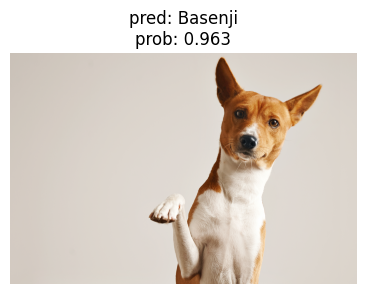

In [18]:
# Make prediction on custom dog photo 1
pred_on_custom_image(image_path="dog-photo-1.jpeg",
                     model=loaded_model,
                     class_names=class_names)

In [19]:
# Make prediction on custom dog photo 2
pred_on_custom_image(image_path="dog-photo-2.jpeg",
                     model=loaded_model,
                     class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


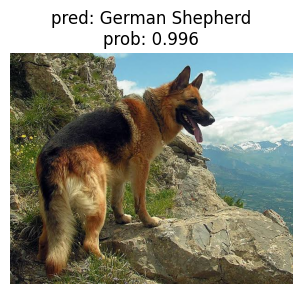

In [20]:
# Make prediction on custom dog photo 3
pred_on_custom_image(image_path="dog-photo-3.jpeg",
                     model=loaded_model,
                     class_names=class_names)

In [21]:
# Make prediction on custom dog photo 4
pred_on_custom_image(image_path="dog-photo-4.jpeg",
                     model=loaded_model,
                     class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


### Extension : Gradio App Demo

In [ ]:
!pip install -q gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 whic

### Extension : Gradio App Demo

In [ ]:
!pip install -q gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which 

In [ ]:
import tensorflow as tf

# Download saved model and labels from Hugging Face

!wget -q https://huggingface.co/spaces/Dhruv-2004/Dog_breed_classification/blob/main/dog_vision_model_demo.keras
!wget -q https://huggingface.co/spaces/Dhruv-2004/Dog_breed_classification/blob/main/stanford_dogs_class_names.txt


In [ ]:

# Load model
model_save_path = "/content/dog_vision_model_demo.keras"
loaded_model_for_demo = tf.keras.models.load_model(model_save_path)


In [ ]:
!wget -q https://huggingface.co/spaces/Dhruv-2004/Dog_breed_classification/blob/main/stanford_dogs_class_names.txt

In [ ]:

# Load labels
with open("/content/stanford_dogs_class_names.txt", "r") as f:
  class_names = [line.strip() for line in f.readlines()]

In [ ]:
# Create prediction function
def pred_on_custom_image(image,
                         model: tf.keras.Model = loaded_model_for_demo,
                         target_size: int = 224,
                         class_names: list = class_names):

  # Note: gradio.inputs.Image handles opening the image
  # # Prepare and load image
  # custom_image = tf.keras.utils.load_img(
  #   path=image_path,
  #   color_mode="rgb",
  #   target_size=target_size,
  # )

  # Create resizing layer to resize the image
  resize = tf.keras.layers.Resizing(height=target_size,
                                    width=target_size)

  # Turn the image into a tensor and resize it
  custom_image_tensor = resize(tf.keras.utils.img_to_array(image))

  # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
  custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

  # Make a prediction with the target model
  pred_probs = model.predict(custom_image_tensor)[0]

  # Predictions get returned as a dictionary of {label: pred_prob}
  pred_probs_dict = {class_names[i]: float(pred_probs[i]) for i in range(len(class_names))}

  return pred_probs_dict

interface_title = "Dog Vision 🐶👁️"
interface_description = "Identify different dogs in images with deep learning. Model trained with TensorFlow/Keras."
interface = gr.Interface(fn=pred_on_custom_image,
                         inputs=gr.Image(),
                         outputs=gr.Label(num_top_classes=3),
                         examples=["dog-photo-1.jpeg",
                                    "dog-photo-2.jpeg",
                                    "dog-photo-3.jpeg",
                                    "dog-photo-4.jpeg"],
                         title=interface_title,
                         description=interface_description)

# Uncomment to launch the interface directly in a notebook
# interface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cd357a2c3710f7076d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cd357a2c3710f7076d.gradio.live
